## visualize bat call data

In [1120]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import numpy as np
from matplotlib.pyplot import imshow
from numpy import random
from datetime import datetime, date, time, timezone

# Using datetime.combine()
d = date(2005, 7, 14)
t = time(12, 30)
datetime.combine(d, t)

datetime.datetime(2005, 7, 14, 12, 30)

In [1121]:
env_file = "/Users/MBall/PycharmProjects/BATMO/batmo/batdetect2-calls/cumulative_activity__Foliage_30T__formatted.csv"
foliage_df = pd.read_csv(env_file)

env_file0 = '/Users/MBall/PycharmProjects/BATMO/batmo/batdetect2-calls/cumulative_activity__Central_30T__formatted.csv'
centralpond_df = pd.read_csv(env_file0)

env_file4 = '/Users/MBall/PycharmProjects/BATMO/batmo/batdetect2-calls/cumulative_activity__Telephone_30T__formatted.csv'
telephonefield_df = pd.read_csv(env_file4)

In [1122]:
foliage_df

,Time,Date,Bat Calls
0,03:00,05-31-23,1.0
1,03:30,05-31-23,1.0
2,04:00,05-31-23,7.0
3,04:30,05-31-23,148.0
4,05:00,05-31-23,252.0
...,...,...,...
1171,11:00,07-25-23,0.0
1172,11:30,07-25-23,0.0
1173,12:00,07-25-23,0.0
1174,12:30,07-25-23,0.0


In [1123]:
centralpond_df

,Time,Date,Bat Calls
0,03:00,05-31-23,1.0
1,03:30,05-31-23,2.0
2,04:00,05-31-23,1.0
3,04:30,05-31-23,187.0
4,05:00,05-31-23,55.0
...,...,...,...
1171,11:00,07-25-23,446.0
1172,11:30,07-25-23,42.0
1173,12:00,07-25-23,1.0
1174,12:30,07-25-23,1.0


In [1124]:
telephonefield_df

,Time,Date,Bat Calls
0,03:00,05-31-23,1.0
1,03:30,05-31-23,1.0
2,04:00,05-31-23,1.0
3,04:30,05-31-23,5030.0
4,05:00,05-31-23,3968.0
...,...,...,...
1171,11:00,07-25-23,1231.0
1172,11:30,07-25-23,67.0
1173,12:00,07-25-23,25.0
1174,12:30,07-25-23,1.0


In [1125]:
env_file2 = "/Users/MBall/PycharmProjects/BATMO/batmo/2023-uwa.csv"
uwa23_df = pd.read_csv(env_file2)

In [1126]:
uwa23_df

,Pseudo-Julian-Date,Date,Time,Temperature,Dewpoint,Relhum,Speed,Gust,Direction,Pressure,Solar,SumRain,Rain
0,2.460097e+06,2023-06-01,00:00,61.0,42.7,50.8,5.8,6.3,292,1014.2,297.0,0.00,0.0
1,2.460097e+06,2023-06-01,00:01,61.2,42.7,50.5,8.3,9.1,285,1014.2,305.0,0.00,0.0
2,2.460097e+06,2023-06-01,00:02,61.3,42.9,50.7,6.0,8.9,326,1014.2,297.2,0.00,0.0
3,2.460097e+06,2023-06-01,00:03,61.4,43.0,50.7,4.1,5.6,285,1014.1,297.2,0.00,0.0
4,2.460097e+06,2023-06-01,00:04,61.6,42.9,50.2,8.1,9.4,275,1014.1,296.6,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90391,2.460160e+06,2023-08-02,18:33,72.7,50.8,46.0,6.9,9.2,181,1013.7,828.4,1.55,0.0
90392,2.460160e+06,2023-08-02,18:34,72.7,50.8,46.0,8.2,10.3,190,1013.7,829.4,1.55,0.0
90393,2.460160e+06,2023-08-02,18:35,72.7,50.7,45.9,9.7,12.6,213,1013.7,830.5,1.55,0.0
90394,2.460160e+06,2023-08-02,18:36,72.7,50.8,46.0,8.8,10.8,207,1013.7,833.3,1.55,0.0


In [1127]:
foliage_df.columns

Index(['Time', 'Date', 'Bat Calls'], dtype='object')

In [1128]:
foliage_df["Time"].iloc[1]

'03:30'

### takes the separate date and hour columns from foliage_df (number of bat calls per day per hour) and creates a line that has the combined date and hour
#### this is to set up a datetime column in the graph so that the bat calls will be staggered. 

In [1129]:
# Assuming 'Date' and 'Time' are separate columns in the DataFrame df
foliage_df['Datetime'] = pd.to_datetime(foliage_df['Time'] + ' ' + foliage_df['Date'], format='%H:%M %m-%d-%y')


In [1130]:
# Assuming 'Date' and 'Time' are separate columns in the DataFrame df
centralpond_df['Datetime'] = pd.to_datetime(centralpond_df['Time'] + ' ' + centralpond_df['Date'], format='%H:%M %m-%d-%y')

In [1131]:
# Assuming 'Date' and 'Time' are separate columns in the DataFrame df
telephonefield_df['Datetime'] = pd.to_datetime(telephonefield_df['Time'] + ' ' + telephonefield_df['Date'], format='%H:%M %m-%d-%y')

In [1132]:
foliage_df

,Time,Date,Bat Calls,Datetime
0,03:00,05-31-23,1.0,2023-05-31 03:00:00
1,03:30,05-31-23,1.0,2023-05-31 03:30:00
2,04:00,05-31-23,7.0,2023-05-31 04:00:00
3,04:30,05-31-23,148.0,2023-05-31 04:30:00
4,05:00,05-31-23,252.0,2023-05-31 05:00:00
...,...,...,...,...
1171,11:00,07-25-23,0.0,2023-07-25 11:00:00
1172,11:30,07-25-23,0.0,2023-07-25 11:30:00
1173,12:00,07-25-23,0.0,2023-07-25 12:00:00
1174,12:30,07-25-23,0.0,2023-07-25 12:30:00


In [1133]:
centralpond_df

,Time,Date,Bat Calls,Datetime
0,03:00,05-31-23,1.0,2023-05-31 03:00:00
1,03:30,05-31-23,2.0,2023-05-31 03:30:00
2,04:00,05-31-23,1.0,2023-05-31 04:00:00
3,04:30,05-31-23,187.0,2023-05-31 04:30:00
4,05:00,05-31-23,55.0,2023-05-31 05:00:00
...,...,...,...,...
1171,11:00,07-25-23,446.0,2023-07-25 11:00:00
1172,11:30,07-25-23,42.0,2023-07-25 11:30:00
1173,12:00,07-25-23,1.0,2023-07-25 12:00:00
1174,12:30,07-25-23,1.0,2023-07-25 12:30:00


### takes the information from foliage_df (Aditya's bat call data from foliage) and extracts the date, time, and number of bat calls per hour and writes that into a .csv file

In [1134]:
telephonefield_df

,Time,Date,Bat Calls,Datetime
0,03:00,05-31-23,1.0,2023-05-31 03:00:00
1,03:30,05-31-23,1.0,2023-05-31 03:30:00
2,04:00,05-31-23,1.0,2023-05-31 04:00:00
3,04:30,05-31-23,5030.0,2023-05-31 04:30:00
4,05:00,05-31-23,3968.0,2023-05-31 05:00:00
...,...,...,...,...
1171,11:00,07-25-23,1231.0,2023-07-25 11:00:00
1172,11:30,07-25-23,67.0,2023-07-25 11:30:00
1173,12:00,07-25-23,25.0,2023-07-25 12:00:00
1174,12:30,07-25-23,1.0,2023-07-25 12:30:00


In [1135]:
uwa23_df.columns

Index([' Pseudo-Julian-Date', 'Date', 'Time', 'Temperature', 'Dewpoint',
       'Relhum', 'Speed', 'Gust', 'Direction', 'Pressure', 'Solar', 'SumRain',
       'Rain'],
      dtype='object')

In [1136]:
uwa23_df["Date"].iloc[1]

'2023-06-01'

### Combines the date and the time into a cell to fix the line issue on the temperature graph

In [1137]:
uwa23_df["Time"].iloc[1]

'00:01'

In [1138]:
uwa23_df['datetime'] = pd.to_datetime(uwa23_df['Date'] + ' ' + uwa23_df['Time'], format='%Y-%m-%d %H:%M:%S')


In [1139]:
uwa23_df

,Pseudo-Julian-Date,Date,Time,Temperature,Dewpoint,Relhum,Speed,Gust,Direction,Pressure,Solar,SumRain,Rain,datetime
0,2.460097e+06,2023-06-01,00:00,61.0,42.7,50.8,5.8,6.3,292,1014.2,297.0,0.00,0.0,2023-06-01 00:00:00
1,2.460097e+06,2023-06-01,00:01,61.2,42.7,50.5,8.3,9.1,285,1014.2,305.0,0.00,0.0,2023-06-01 00:01:00
2,2.460097e+06,2023-06-01,00:02,61.3,42.9,50.7,6.0,8.9,326,1014.2,297.2,0.00,0.0,2023-06-01 00:02:00
3,2.460097e+06,2023-06-01,00:03,61.4,43.0,50.7,4.1,5.6,285,1014.1,297.2,0.00,0.0,2023-06-01 00:03:00
4,2.460097e+06,2023-06-01,00:04,61.6,42.9,50.2,8.1,9.4,275,1014.1,296.6,0.00,0.0,2023-06-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90391,2.460160e+06,2023-08-02,18:33,72.7,50.8,46.0,6.9,9.2,181,1013.7,828.4,1.55,0.0,2023-08-02 18:33:00
90392,2.460160e+06,2023-08-02,18:34,72.7,50.8,46.0,8.2,10.3,190,1013.7,829.4,1.55,0.0,2023-08-02 18:34:00
90393,2.460160e+06,2023-08-02,18:35,72.7,50.7,45.9,9.7,12.6,213,1013.7,830.5,1.55,0.0,2023-08-02 18:35:00
90394,2.460160e+06,2023-08-02,18:36,72.7,50.8,46.0,8.8,10.8,207,1013.7,833.3,1.55,0.0,2023-08-02 18:36:00


In [1140]:
# Convert Fahrenheit to Celsius
uwa23_df['Temperature'] = (uwa23_df['Temperature'] - 32) * 5/9

# Bat Call Data

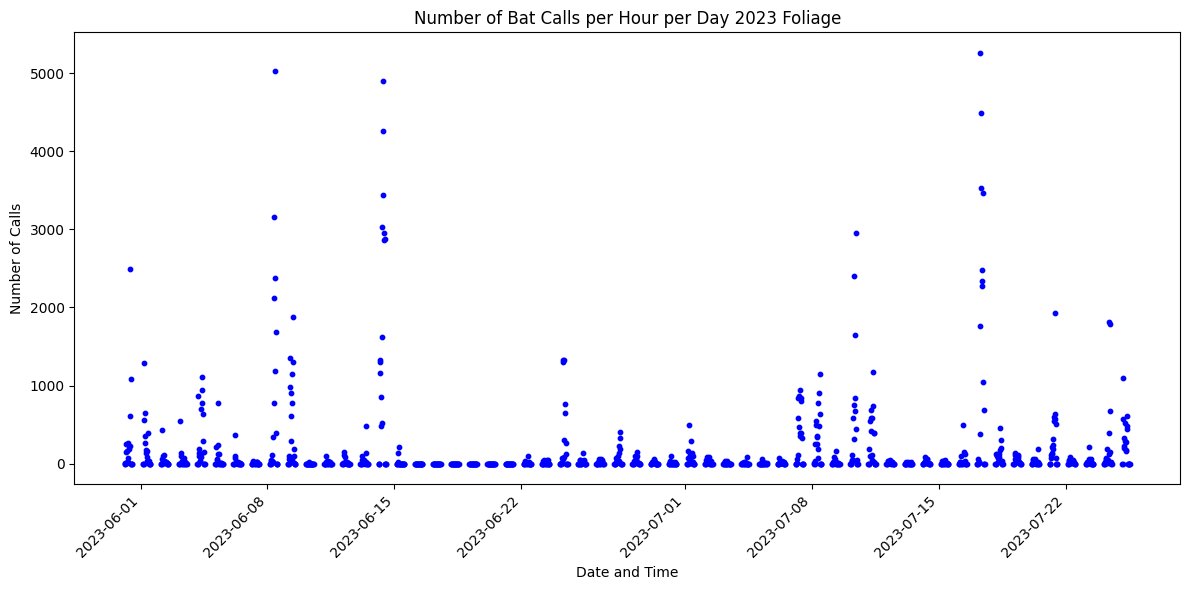

In [1141]:
# Assuming you already have a DataFrame called 'foliage_df' with the 'Datetime' column

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(foliage_df['Datetime'], foliage_df['Bat Calls'], s=10, marker='o', color='b')

# Set axis labels and title
plt.xlabel('Date and Time')
plt.ylabel('Number of Calls')
plt.title('Number of Bat Calls per Hour per Day 2023 Foliage')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


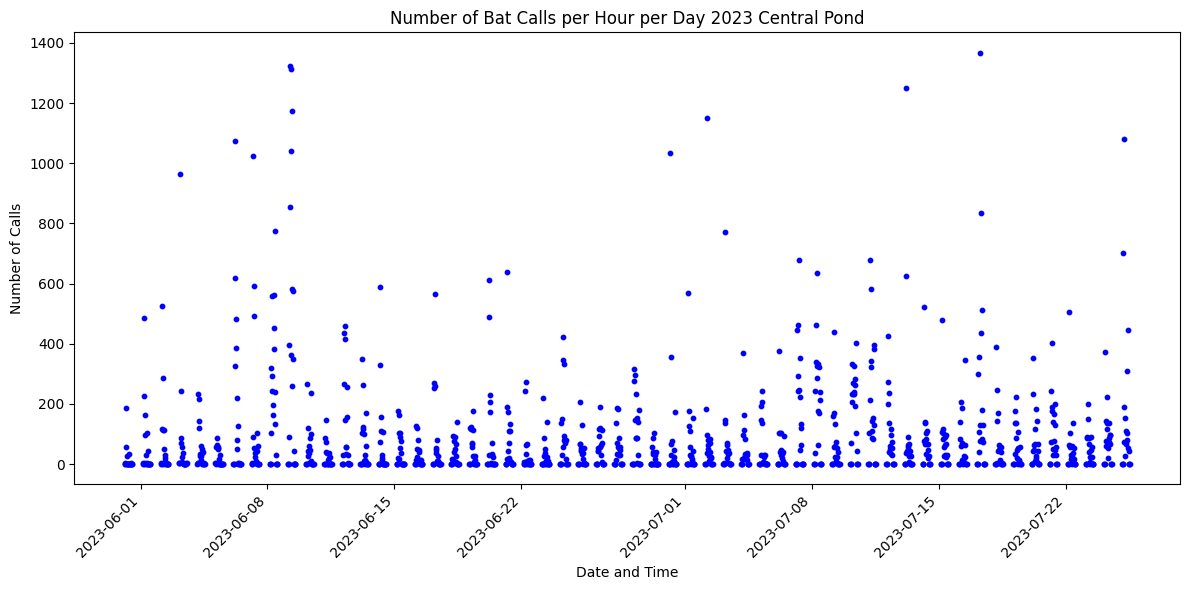

In [1142]:
# Assuming you already have a DataFrame called 'centralpond_df' with the 'Datetime' column

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(centralpond_df['Datetime'], centralpond_df['Bat Calls'], s=10, marker='o', color='b')

# Set axis labels and title
plt.xlabel('Date and Time')
plt.ylabel('Number of Calls')
plt.title('Number of Bat Calls per Hour per Day 2023 Central Pond')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

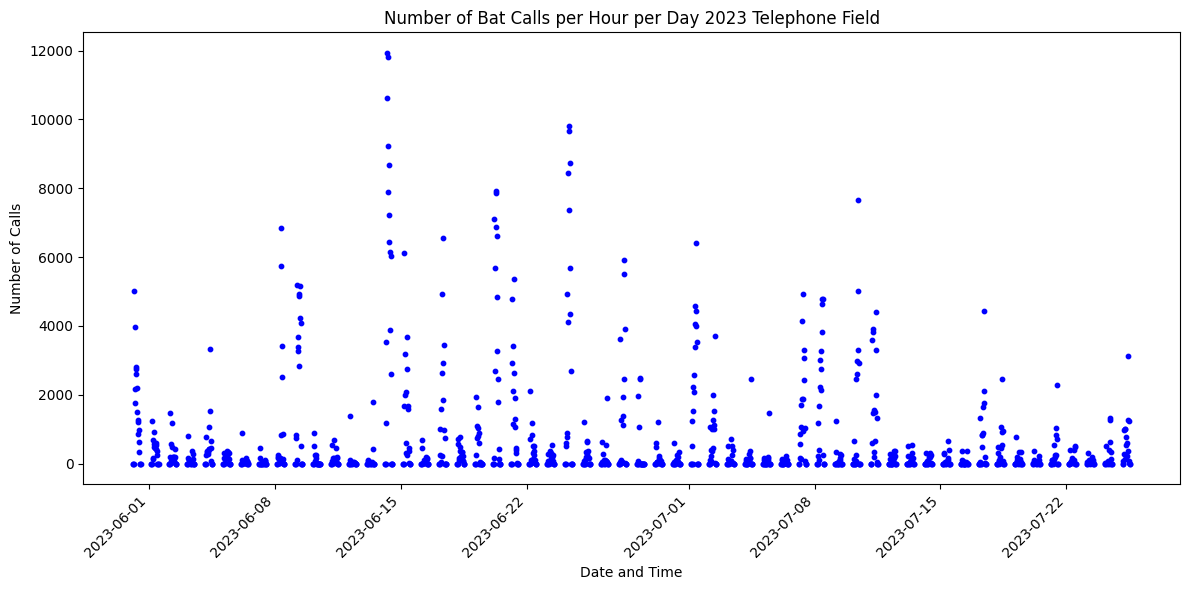

In [1143]:
# Assuming you already have a DataFrame called 'telephonefield_df' with the 'Datetime' column

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(telephonefield_df['Datetime'], telephonefield_df['Bat Calls'], s=10, marker='o', color='b')

# Set axis labels and title
plt.xlabel('Date and Time')
plt.ylabel('Number of Calls')
plt.title('Number of Bat Calls per Hour per Day 2023 Telephone Field')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

# Temperature Data

C:\Users\MBall\AppData\Local\Temp\ipykernel_17332\2124346261.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('turbo')


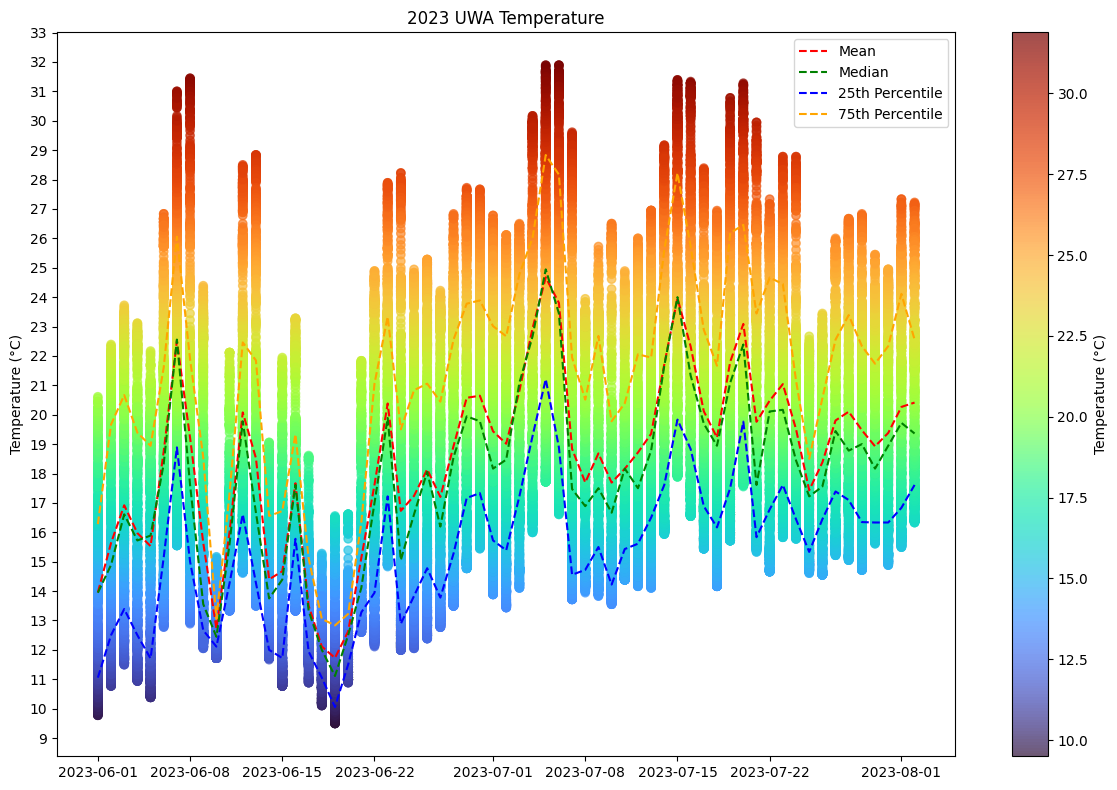

In [1144]:
# Read the CSV file into a DataFrame, skipping the header row
data = pd.read_csv('/Users/MBall/PycharmProjects/BATMO/batmo/2023-uwa.csv')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Convert Fahrenheit to Celsius
data['Temperature'] = (data['Temperature'] - 32) * 5/9

# Set up the plot
fig, ax1 = plt.subplots(1, figsize=(12, 8))

# Create temperature gradient colormap
cmap = plt.cm.get_cmap('turbo')

# Calculate statistics per date
daily_stats = data.groupby(data['Date'].dt.date)['Temperature'].agg(['mean', 'median', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)])
daily_stats.columns = ['Mean', 'Median', '25th Percentile', '75th Percentile']

# Plot the scatter plot with temperature gradient colors and adjusted opacity
sc = ax1.scatter(data['Date'], data['Temperature'], c=data['Temperature'], cmap=cmap, alpha=0.7)
ax1.set_ylabel('Temperature (°C)')
ax1.set_title('2023 UWA Temperature')

# Plot trendlines per date
ax1.plot(daily_stats.index, daily_stats['Mean'], color='red', linestyle='--', label='Mean')
ax1.plot(daily_stats.index, daily_stats['Median'], color='green', linestyle='--', label='Median')
ax1.plot(daily_stats.index, daily_stats['25th Percentile'], color='blue', linestyle='--', label='25th Percentile')
ax1.plot(daily_stats.index, daily_stats['75th Percentile'], color='orange', linestyle='--', label='75th Percentile')

# Add legend
ax1.legend()

# Add colorbar
cbar = fig.colorbar(sc, ax=ax1)
cbar.set_label('Temperature (°C)')

# Adjust the y-axis ticks
ax1.yaxis.set_major_locator(MultipleLocator(1))

# Adjust the layout and spacing
plt.tight_layout()

# Display the plot
plt.show()

# 2023 Foliage Bat Calls vs Temperature

c:\Users\MBall\.conda\envs\batmo\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\MBall\AppData\Local\Temp\ipykernel_17332\1709435807.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  uwa23_df_resampled = uwa23_df.resample('H').mean()


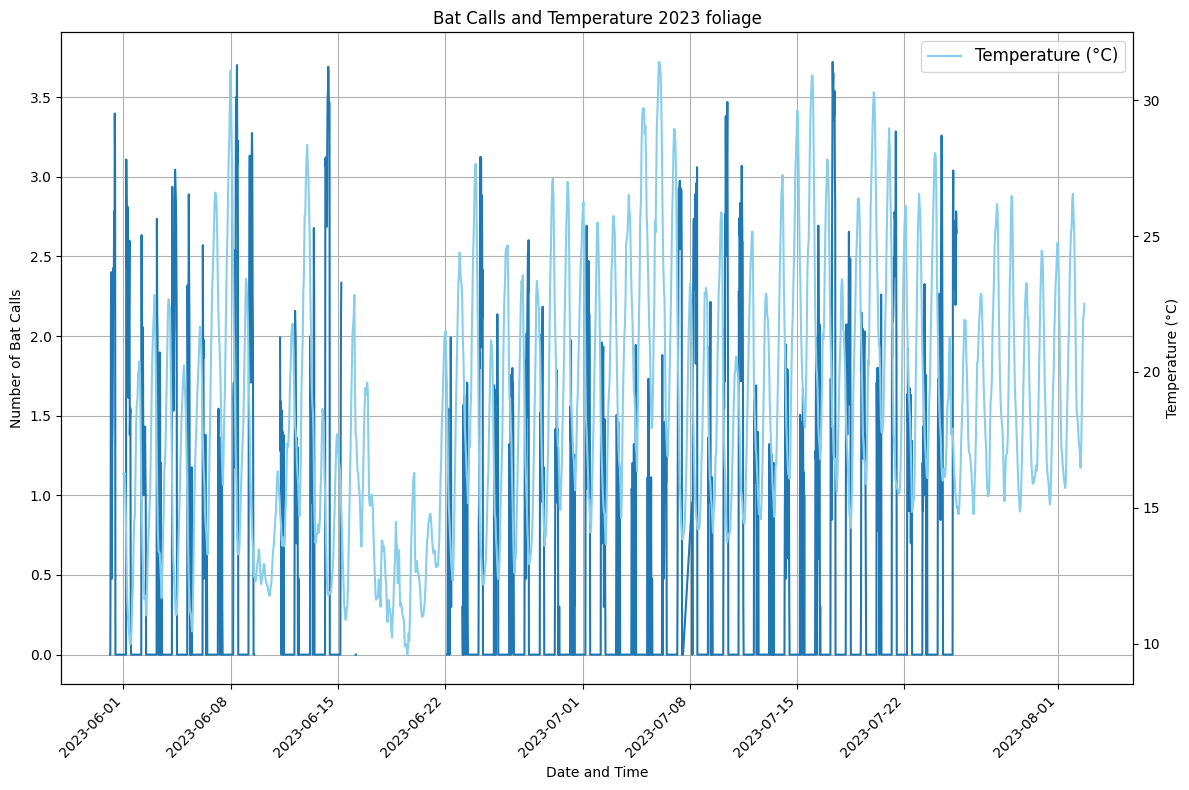

In [1145]:
# Assuming you already have the DataFrame 'foliage_calls_2023_df' with the bat call data

# Set up the plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the scatter plot with number of bat calls on the primary y-axis
ax1.plot(foliage_df['Datetime'], np.log10(foliage_df['Bat Calls']))
ax1.set_xlabel('Date and Time')
ax1.set_ylabel('Number of Bat Calls')
ax1.set_title('Bat Calls and Temperature 2023 foliage')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Create a second y-axis for temperature
ax2 = ax1.twinx()

# Assuming you already have the DataFrame 'uwa23_df' with the temperature data
# Resample the temperature data to 30-minute intervals and calculate the mean
uwa23_df.set_index('datetime', inplace=True)
uwa23_df_resampled = uwa23_df.resample('H').mean()
uwa23_df_resampled.reset_index(inplace=True)

# Plot temperature on the second y-axis
ax2.plot(uwa23_df_resampled['datetime'], uwa23_df_resampled['Temperature'], color='skyblue', linestyle='-', label='Temperature (°C)')
ax2.set_ylabel('Temperature (°C)')

# Add legend for both y-axes
ax2.legend(loc='upper right', fontsize=12)

# Add gridlines to both axes
ax1.grid(True)


# Adjust the layout and spacing
plt.tight_layout()

# Display the plot
plt.show()




# 2023 Central Pond Bat Calls vs Temperature

C:\Users\MBall\AppData\Local\Temp\ipykernel_17332\2976979008.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  uwa23_df_resampled = uwa23_df.resample('H').mean()


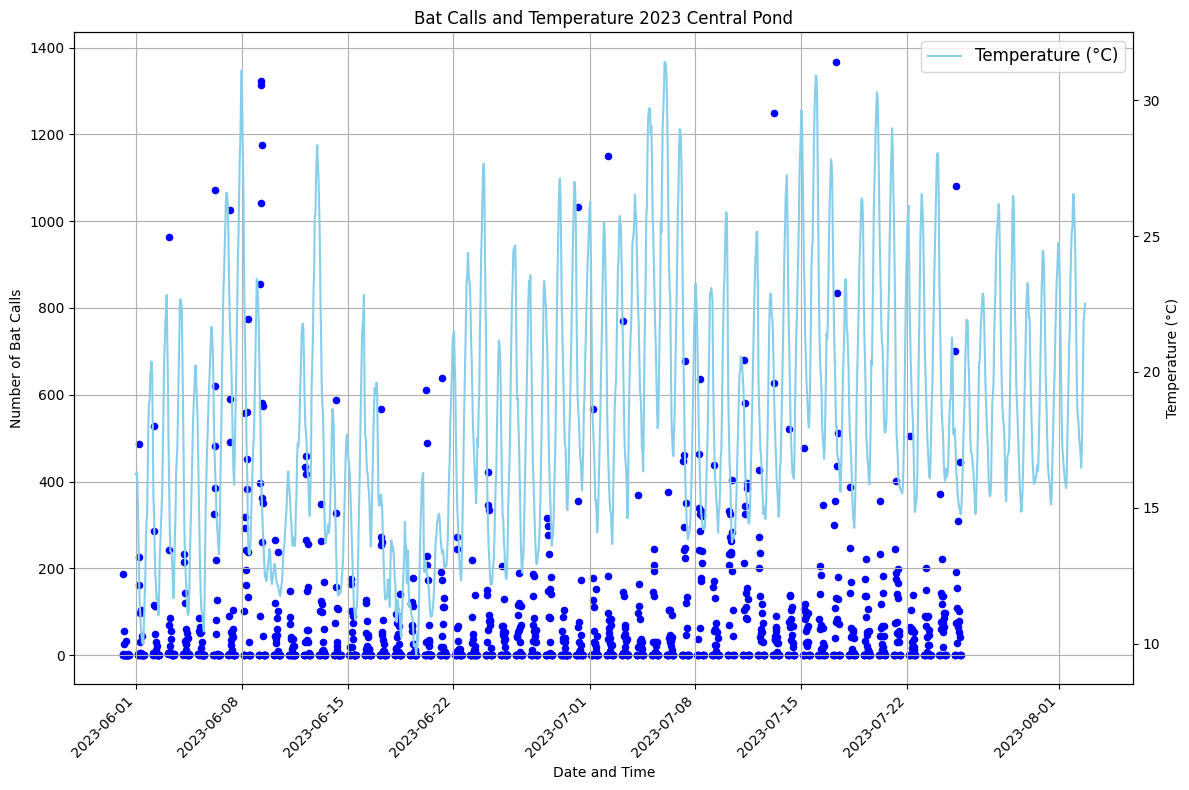

In [1146]:
# Assuming you already have the DataFrame 'centralpond_calls_2023_df' with the bat call data

# Set up the plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the scatter plot with number of bat calls on the primary y-axis
ax1.scatter(centralpond_df['Datetime'], centralpond_df['Bat Calls'], s=20, marker='o', color='b')
ax1.set_xlabel('Date and Time')
ax1.set_ylabel('Number of Bat Calls')
ax1.set_title('Bat Calls and Temperature 2023 Central Pond')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Create a second y-axis for temperature
ax2 = ax1.twinx()

# Assuming you already have the DataFrame 'uwa23_df' with the temperature data
# Resample the temperature data to 30-minute intervals and calculate the mean

uwa23_df_resampled = uwa23_df.resample('H').mean()
uwa23_df_resampled.reset_index(inplace=True)

# Plot temperature on the second y-axis
ax2.plot(uwa23_df_resampled['datetime'], uwa23_df_resampled['Temperature'], color='skyblue', linestyle='-', label='Temperature (°C)')
ax2.set_ylabel('Temperature (°C)')

# Add legend for both y-axes
ax2.legend(loc='upper right', fontsize=12)

# Add gridlines to both axes
ax1.grid(True)


# Adjust the layout and spacing
plt.tight_layout()

# Display the plot
plt.show()




# 2023 Telephone Field Bat Calls vs Temperature

C:\Users\MBall\AppData\Local\Temp\ipykernel_17332\145314349.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  uwa23_df_resampled = uwa23_df.resample('H').mean()


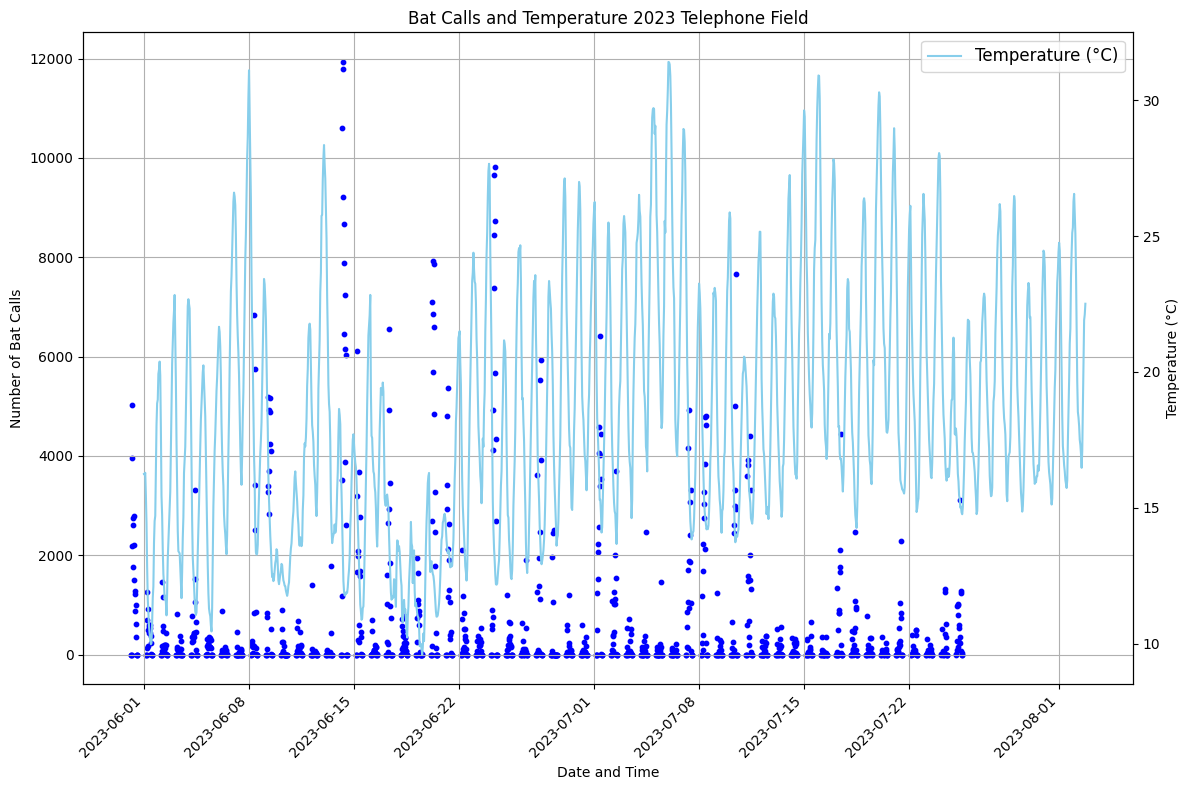

In [1147]:
# Assuming you already have the DataFrame 'foliage_calls_2023_df' with the bat call data

# Set up the plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the scatter plot with number of bat calls on the primary y-axis
ax1.scatter(telephonefield_df['Datetime'], telephonefield_df['Bat Calls'], s=10, marker='o', color='b')
ax1.set_xlabel('Date and Time')
ax1.set_ylabel('Number of Bat Calls')
ax1.set_title('Bat Calls and Temperature 2023 Telephone Field')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Create a second y-axis for temperature
ax2 = ax1.twinx()

# Assuming you already have the DataFrame 'uwa23_df' with the temperature data
# Resample the temperature data to 30-minute intervals and calculate the mean

uwa23_df_resampled = uwa23_df.resample('H').mean()
uwa23_df_resampled.reset_index(inplace=True)

# Plot temperature on the second y-axis
ax2.plot(uwa23_df_resampled['datetime'], uwa23_df_resampled['Temperature'], color='skyblue', linestyle='-', label='Temperature (°C)')
ax2.set_ylabel('Temperature (°C)')

# Add legend for both y-axes
ax2.legend(loc='upper right', fontsize=12)

# Add gridlines to both axes
ax1.grid(True)


# Adjust the layout and spacing
plt.tight_layout()

# Display the plot
plt.show()
